# Decision Trees for classification - Full Example

> “A decision tree is a decision support tool that uses a tree-like model of decisions and their possible consequences, including chance event outcomes, resource costs, and utility. It is one way to display an algorithm that only contains conditional control statements.” (Wikipedia)


Traditionally decision trees are drawn manually, but they can be learned using a Machine Learning. They can be used for both regression and classification problems. In this article we will focus on classification problems. Let's consider the following example data:

In [1]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

In [2]:
data_dict = {'age' :[24, 30, 36, 36, 42, 44, 46, 47, 47, 51], 
             'likes_dogs':[0, 1, 0, 0, 0, 1, 1, 1, 0, 1], 
             'likes_gravity': [0, 1, 1, 0, 0, 1, 0, 1, 1, 1], 
             'going_to_be_an_astronaut': [0, 1, 1, 0, 0, 1, 0, 1, 0, 1]}

In [3]:
df = pd.DataFrame.from_dict(data_dict)
df

,age,likes_dogs,likes_gravity,going_to_be_an_astronaut
0,24,0,0,0
1,30,1,1,1
2,36,0,1,1
3,36,0,0,0
4,42,0,0,0
5,44,1,1,1
6,46,1,0,0
7,47,1,1,1
8,47,0,1,0
9,51,1,1,1


This table shows us whether a person is going to be an astronaut depending on three features: the person's age, whether or not the person likes dogs and whether or not the person likes gravity. Let's have a look at the resulting decision tree, before going into detail how it is constructed.

![dt_full_tree.drawio.png](dt_full_tree.drawio.png)

## Terms
The decision tree allows us to decide whether a person is going to be an astronaut by following the pathes from the top to the bottom. The first thing we can observe is, that a decision tree allows us to mix data types. We can use numerical data ("age") and categorical data ("likes dogs", "likes gravity") in the same tree. Let's now get familiar with some terms.

**Root Node:** The top-level node. The first decision that is taken.

**Branches:** Branches represent sub-trees.

**Node:** A node represents a split into further (child) nodes.

**Leaf:** Leafs are at the end of the branches, i.e. they don't split any more. They represent possible outcomes for each action. 

**Parent Node:** A node which precedes a (child) nodes is called a parent node.

**Child Node:**  A node under another node is a child node.

**Splitting:** The process of dividing a node into two (child) nodes.

**Pruning:** Removing the (child) nodes of a parent node is called pruning. A tree is grown through splitting and shrunk through pruning.

![decision_tree.drawio.png](decision_tree.drawio.png)
*decision tree illustration*

## Create a Decision  Tree

To create a decision tree we need to find a way to split the data set ($D$) into two data sets ($D_1$) and ($D_2$). There are different criteria that can be used in order to find the next split, see e.g. [here](https://www.analyticsvidhya.com/blog/2020/06/4-ways-split-decision-tree/#:~:text=Steps%20to%20split%20a%20decision%20tree%20using%20Information%20Gain%3A,entropy%20or%20highest%20information%20gain). We will concentrate on one of them: **Gini Impurity**, which is a criterium for categorical target variables and also the criterium used by the python library [scikit-learn](https://scikit-learn.org/stable/modules/tree.html#classification). 

### Gini Impurity

The Gini Impurity is calculated as follows:

Gini Impurity ($D$) = $\frac{n_1}{n} * Gini(D_1) + \frac{n_2}{n} * Gini(D_2)$

with $n = n_1 + n_2$ the size of the data set ($D$) and

Gini($D_j$) = $1 - \sum_{j=1}^{c} p_j^2$,

with $p_j$ the probability of samples belonging to class $j$ at a given node, and $c$ the number of classes.
The lower the Gini Impurity, the higher is the homogeneity of the node. The Gini Impurity of a pure node is zero. To split a decision tree using Gini Impurity, the following steps need to be performed.

1. For each possible split, calculate the Gini Impurity of each child node

2. Calculate the Gini Impurity of each split as the weighted average Gini Impurity of child nodes

3. Select the split with the lowest value of Gini Impurity

Until you achieve homogeneous nodes, repeat steps 1-3

To understand this better, let's have a look at an example.

## First Example: Decision Tree with two binary features

Before greating the decision tree for our entire dataset, we will first consider a subset, that only considers two features: "likes gravity" and "likes dogs".

In [5]:
df1 = df[["likes_dogs", "likes_gravity", "going_to_be_an_astronaut"]]
df1

,likes_dogs,likes_gravity,going_to_be_an_astronaut
0,0,0,0
1,1,1,1
2,0,1,1
3,0,0,0
4,0,0,0
5,1,1,1
6,1,0,0
7,1,1,1
8,0,1,0
9,1,1,1


The first thing we have to decide is, which feature is going to be the Root Node. We do that by predicting the target with only one of the features and then use the feature that has the lowest Gini Impurity as a root node. That is in our case we build two shallow trees, with just the root node and two leafs. In the first case we use "likes gravity" as a root node and in the second case "likes dogs". We then calculate the Gini Impurity for both. The trees look like this:

![dt_grav_dogs_stump.drawio.png](dt_grav_dogs_stump.drawio.png)

The Gini Impurity for these trees are calculated as follows:

**Case 1**:

Dataset 1:

Gini ($D_1$) = $1 - \frac{5}{5+1}^2 - \frac{1}{5+1}^2 = 0.28$

Dataset 2:

Gini ($D_2$) = $1 - \frac{0}{0+4}^2 - \frac{4}{0+4}^2 = 0$

The Gini Impurity is the weighted mean of both:

Gini Impurity = $\frac{6}{10} * 0.28 + \frac{4}{10} * 0 = 0.168$

**Case 2**:

Dataset 1:

Gini ($D_1$) = $1 - \frac{4}{1+4}^2 - \frac{1}{1+4}^2 = 0.32$

Dataset 2:

Gini ($D_2$) = $1 - \frac{1}{1+4}^2 - \frac{4}{1+4}^2 = 0.32$

The Gini Impurity is the weighted mean of both:

Gini Impurity = $\frac{5}{10} * 0.32 + \frac{5}{10} * 0.32 = 0.32$

That is the first case has lower Gini Impurity and is the chosen split. In this simple example, only one feature remains and we can build the final decision tree.

![dt_grav_dogs.drawio.png](dt_grav_dogs.drawio.png)

## Second Example: Add numerical Variable

Until now we considered only a subset of our dataframe, the categorical variables. Now we will add the numerical variable "age". The criterium for splitting is the same. We already know the Gini Impurities for "likes gravity" and "likes dogs". The calculation for the Gini Impurity of a numerical variable is similar, however the decision takes more calculations. The following steps need to be done 

1. Sort the dataframe by age

2. Calculate the mean of neighbouring values

3. Calculate the Gini Impurity for all splits for each of these means

![dt_numerical_variable.drawio.png](dt_numerical_variable.drawio.png)

![dt_numerical_full.drawio.png](dt_numerical_full.drawio.png)

we see that the Gini Impurity of all possible age splits is higher than the one for "likes gravity" and "likes dogs". The lowest Gini Impurity is, when using "likes gravity", i.e. this is our first split. 

![dt_grav_split.drawio.png](dt_grav_split.drawio.png)

The subset Dataset 2 is already pure, that is this node is a leaf and no further splitting is necessary. The subset Dataset 1 is not pure and can be split further. We do this in the same way as before: We calculate the Gini Impurity for each feature: "likes dogs" and "age".

![dt_split2.drawio.png](dt_split2.drawio.png)

We see that the lowest Gini Impurity is given by the split "likes dogs". We now can build our final tree.

![dt_full_tree.drawio.png](dt_full_tree.drawio.png)

## Advantages and Disadvantages of Decision Trees

Decision trees are a popular algorithm for several reasons:

Explanatory Power: The output of decision trees is interpretable. It can be understood by people without analytical or mathematical backgrounds. It does not require any statistical knowledge to interpret them.
Exploratory data analysis: Decision trees can enable analysts to identify significant variables and important relations between two or more variables, helping to surface the signal contained by many input variables.
Minimal data cleaning: Because decision trees are resilient to outliers and missing values, they require less data cleaning than some other algorithms.
Any data type: Decision trees can make classifications based on both numerical and categorical variables.
Non-parametric: A decision tree is a non-parametric algorithm, as opposed to neural networks, which process input data transformed into a tensor, via tensor multiplication using large number of coefficients, known as parameters.
Learn to build AI in Simulations »

Disadvantages

Overfitting: Over fitting is a common flaw of decision trees. Setting constraints on model parameters (depth limitation) and making the model simpler through pruning are two ways to regularize a decision tree and improve its ability to generalize onto the test set.
Predicting continuous variables: While decision trees can ingest continuous numerical input, they are not a practical way to predict such values, since decision-tree predictions must be separated into discrete categories, which results in a loss of information when applying the model to continuous values.
Heavy feature engineering: The flip side of a decision tree’s explanatory power is that it requires heavy feature engineering. When dealing with unstructured data or data with latent factors, this makes decision trees sub-optimal. Neural networks are clearly superior in this regard.

# Scikit-learn

In Python we can use the scikit-learn libary for building a decision tree (https://scikit-learn.org/stable/modules/tree.html#classification). The resulting tree is the same as we built, only the splitting criteria is named with "<=" instead of "<", and the "true" and "false" pathes go to the other direction. That is, there are some differences in the appearence.

In [20]:
clf = DecisionTreeClassifier()
X = df.iloc[:,:-1]
y = df["going_to_be_an_astronaut"]

In [21]:
X

,age,likes_dogs,likes_gravity
0,24,0,0
1,30,1,1
2,36,0,1
3,36,0,0
4,42,0,0
5,44,1,1
6,46,1,0
7,47,1,1
8,47,0,1
9,51,1,1


In [22]:
clf.fit(X,y)

DecisionTreeClassifier()

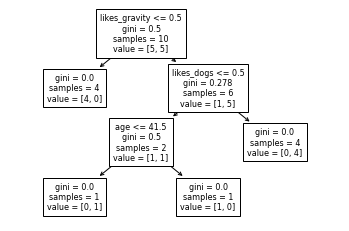

In [26]:
plot_tree(clf, feature_names=['age', 'likes_dogs', 'likes_gravity'], fontsize=8);

# References

* https://wiki.pathmind.com/decision-tree
* https://www.analyticsvidhya.com/blog/2020/06/4-ways-split-decision-tree/#:~:text=Steps%20to%20split%20a%20decision%20tree%20using%20Information%20Gain%3A,entropy%20or%20highest%20information%20gain